In [43]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from scipy.special import gamma
import numpy as np
plt.rcParams.update({'font.size': 16})

# Poisson Processes, Chapter 3

## by John Kingman

# ~~Poisson~~Pokemon Processes, Chapter ~~3~~ 1

## by ~~John Kingman~~Johto Kingler

# Outline

### 1. ~~The Combat Power Multiplier (CPM)~~Monotonic Nonlinearities!

### 2. ~~Combat Power~~Navigating Pareto Frontiers!

### 3. ~~Catching Pokemon~~Geometric Series, Monte Carlo Simulations, and Poisson Processes!

# 1. Core Monotonic Nonlinearity: The CPM

We will start off both of the subsequent sections with this quantity!

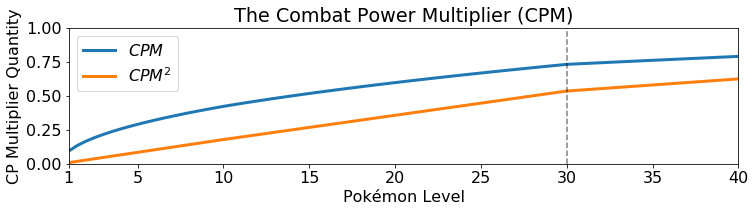

In [406]:
import pandas as pangoro
cpm = pangoro.read_csv('cp_multiplier.txt', delimiter="\t")
cpm['$CPM^2$'] = cpm['CP Multiplier']**2
cpm['$CPM$'] = cpm['CP Multiplier']
plt.figure(figsize=(12,2.5))
cpm.plot('Level', '$CPM$', ax=plt.gca(), lw=3)
cpm.plot('Level', '$CPM^2$', ax=plt.gca(), lw=3)
plt.axvline(30, ls='--', color='black', alpha=0.5)
plt.xlabel('Pokémon Level')
plt.ylabel('CP Multiplier Quantity')
plt.title('The Combat Power Multiplier (CPM)')
plt.ylim(0, 1); plt.xlim(1, 40)
plt.xticks([1,5,10,15,20,25,30,35,40]); plt.show()

# 2. Pareto Frontiers in Pokémon Combat


## 2.1 How CPM is used in calculating Combat Power (CP)

$$
\begin{split}
Atk &= (BaseAtk + IndividualAtk) * CPM^2 \\
Def &= (BaseDef + IndividualDef) * CPM^2 \\
Sta &= (BaseSta + IndividualSta) * CPM^2 \\
CP &= \mathtt{np.floor}\left(\frac{1}{10}\left(Atk * \sqrt{Def} * \sqrt{Sta}\right)\right)
\end{split}
$$

Let's visualize some of these statistics!

In [322]:
# Loading the dataset

dex = pangoro.read_json('pokedex.json')
dex = dex[~dex.name.str.contains('mega')]
dex = dex[~dex.name.str.contains('primal')]
dex = dex[~dex.name.str.contains('forme')]
dex = dex[~dex.name.str.contains(' ')]
dex['baseSta'] = dex.baseStm

dex['max_cp_at_lvl40'] = np.floor(
    0.1 *
    (dex.baseAtk+15) *
    np.sqrt(dex.baseDef+15) * 
    np.sqrt(dex.baseStm+15) * 
    cpm['CP Multiplier'].max()**2).astype(int)

dex['min_cp_at_lvl40'] = np.floor(
    0.1 *
    (dex.baseAtk+1) *
    np.sqrt(dex.baseDef+1) * 
    np.sqrt(dex.baseStm+1) * 
    cpm['CP Multiplier'].max()**2).astype(int)

max_cp = {}
for name, cp in dex[['name', 'max_cp_at_lvl40']].values:
  max_cp[name] = cp

dex['abs_cp_diff'] = dex['max_cp_at_lvl40'] - dex['min_cp_at_lvl40']
dex['pct_cp_diff'] = (dex['max_cp_at_lvl40'] - dex['min_cp_at_lvl40']) / dex['max_cp_at_lvl40']

## 2.2 Visualizing the Pidgeyotto Frogadier


### 2.2.1 Stats vs. other stats

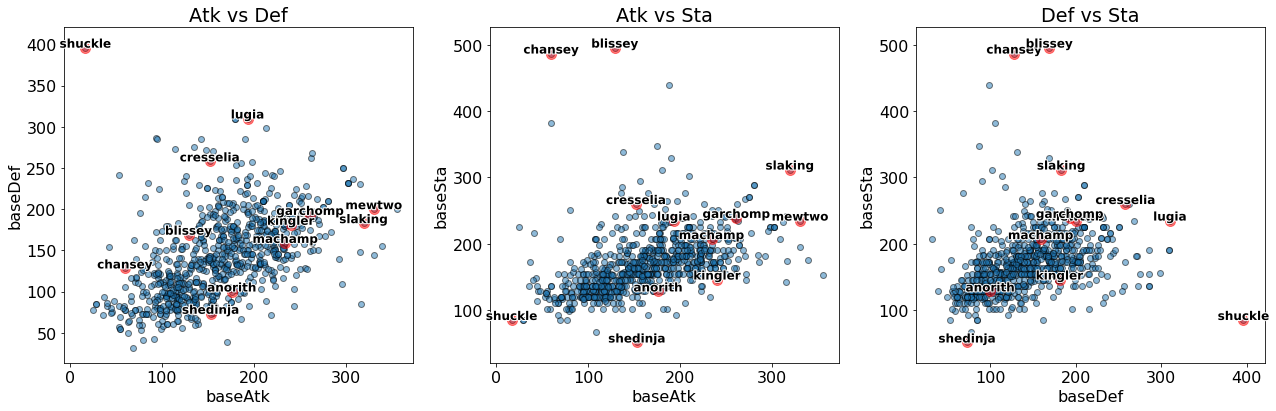

In [337]:
featured_pokemon = ['chansey', 'blissey', 'lugia', 'slaking',
                    'shedinja', 'mewtwo', 'machamp', 'kingler',
                    'cresselia', 'garchomp', 'anorith', 'shuckle']

def compare(attr1, attr2):
  plt.xlabel(attr1)
  plt.ylabel(attr2)
  plt.scatter(dex[attr1], dex[attr2], edgecolors='black', alpha=0.5)
  for fp in featured_pokemon:
    x = dex[dex.name==fp][attr1].values[0]
    y = dex[dex.name==fp][attr2].values[0]
    plt.scatter(x, y, color='red', alpha=0.5, s=100)
    txt = plt.text(x, y, fp, ha='center', fontsize=12, fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    
plt.figure(figsize=(18,6))
plt.subplot(131, title='Atk vs Def'); compare('baseAtk', 'baseDef')
plt.subplot(132, title='Atk vs Sta'); compare('baseAtk', 'baseSta')
plt.subplot(133, title='Def vs Sta'); compare('baseDef', 'baseSta')
plt.tight_layout(); plt.show()

### 2.2.2 Pokémon with lowest max CP

In [317]:
dex.sort_values('max_cp_at_lvl40')[['name', 'min_cp_at_lvl40', 'max_cp_at_lvl40', 'baseAtk', 'baseDef', 'baseSta']][:10]

,name,min_cp_at_lvl40,max_cp_at_lvl40,baseAtk,baseDef,baseSta
455,magikarp,161,274,29,85,85
235,feebas,161,274,29,85,85
42,azurill,230,364,36,71,137
329,happiny,215,371,25,77,225
776,sunkern,265,395,55,55,102
395,kricketot,266,401,45,74,114
715,shuckle,207,405,17,396,85
739,smeargle,284,431,40,83,146
377,kakuna,290,432,46,75,128
141,cosmog,293,432,54,57,125


### 2.2.3 Pokémon with highest max CP

In [318]:
dex.sort_values('max_cp_at_lvl40')[['name', 'min_cp_at_lvl40', 'max_cp_at_lvl40', 'baseAtk', 'baseDef', 'baseSta']][-10:][::-1]

,name,min_cp_at_lvl40,max_cp_at_lvl40,baseAtk,baseDef,baseSta
730,slaking,4796,5308,319,183,312
642,regigigas,4686,5182,315,231,242
498,mewtwo,4502,4995,330,200,235
399,kyogre,4432,4914,297,250,225
316,groudon,4432,4914,297,250,225
908,zekrom,4342,4820,302,232,225
647,reshiram,4342,4820,302,232,225
178,dialga,4342,4820,302,232,225
747,solgaleo,4341,4818,280,210,289
440,lunala,4341,4818,280,210,289


### 2.2.4 Pokémon with highest relative difference in max/min CP

In [332]:
dex.sort_values('pct_cp_diff')[['name', 'min_cp_at_lvl40', 'max_cp_at_lvl40', 'baseAtk', 'baseDef', 'baseSta']][-10:][::-1]

,name,min_cp_at_lvl40,max_cp_at_lvl40,baseAtk,baseDef,baseSta
715,shuckle,207,405,17,396,85
329,happiny,215,371,25,77,225
235,feebas,161,274,29,85,85
455,magikarp,161,274,29,85,85
42,azurill,230,364,36,71,137
474,marill,302,461,37,93,172
739,smeargle,284,431,40,83,146
395,kricketot,266,401,45,74,114
776,sunkern,265,395,55,55,102
377,kakuna,290,432,46,75,128


## 2.3 Max CP isn't the full story

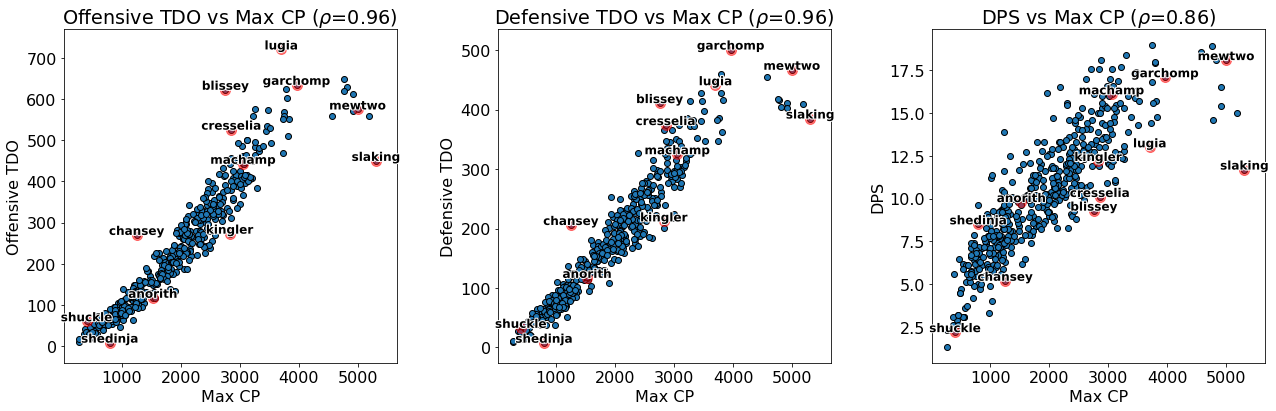

In [414]:
from scipy.stats import pearsonr

tdo = pangoro.read_csv('tdo.csv')
tdo['NAME'] = [name.lower() for name in tdo['NAME']]
max_off_tdo = tdo.groupby('NAME')['OFF TDO'].max()
max_def_tdo = tdo.groupby('NAME')['DEF TDO'].max()
max_dps = tdo.groupby('NAME')['DPS'].max()

pokemon = set(dex['name']).intersection(set(tdo['NAME']))
fig = plt.figure(figsize=(18,6))
for i, (max_tdo, tdo_type) in enumerate([(max_off_tdo, 'Offensive TDO'), (max_def_tdo, 'Defensive TDO'), (max_dps, 'DPS')]):
  cps = [max_cp[n] for n in pokemon]
  tdos = [max_tdo[n] for n in pokemon]
  corr = pearsonr(cps, tdos)[0]
  plt.subplot(1,3,i+1, title=tdo_type+ ' vs Max CP ($\\rho$={:.2f})'.format(corr))
  plt.scatter(cps, tdos, edgecolors='black')
  for n in featured_pokemon:
    plt.scatter(max_cp[n], max_tdo[n], color='red', alpha=0.5, s=100)
    txt = plt.text(max_cp[n], max_tdo[n], n, ha='center', fontsize=12, fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
  plt.xlabel('Max CP')
  plt.ylabel(tdo_type)

plt.tight_layout()

# 3 Towards Pokémon Poisson Processes


## 3.1 How CPM is used in calculating Catch Probability
$$
\begin{split}
P(ThrowFails) &= \left(1 - \frac{BaseCatchRate}{2 * CPM}\right)^{Ball∗Curve∗Berry∗Throw∗Medal} \\
Ball &= \begin{cases}
    2.0 & \text{ if } Ultra Ball \\
    1.5 & \text{ if } Great Ball \\
    1.0 & \text{ otherwise } \\
   \end{cases} \\
Curve &= \begin{cases}
    1.7 & \text{ if } Curveball \\
    1.0 & \text{ otherwise }
   \end{cases} \\
Berry &= \begin{cases}
    2.5 & \text{ if } Golden Razz \\
    1.5 & \text{ if } Razz Berry, Silver Pinap \\
    1.0 & \text{ otherwise }
\end{cases} \\
Throw &= \begin{cases}
   2.0 - InnerRadius & \text{ if } WithinRadius \\
   1.0 & \text{ otherwise }
\end{cases} \\
Medal &= \begin{cases}
    1.3 & \text{ if } Gold \\
    1.2 & \text{ if } Silver \\
    1.1 & \text{ if } Bronze \\
    1.0 & \text{ otherwise }
\end{cases} \\
\end{split}
$$

Experimental data and p-values can been viewed at [gamepress](https://pokemongo.gamepress.gg/catch-mechanics).

## 3.2 Catch probability over multiple throws


Note that [rigorous experimental evidence](https://pokemongo.gamepress.gg/flee-rate) has established that flee rate has no dependence on CP:

$$
P(PokemonFlees) = BaseFleeRate
$$

Letting

$$\begin{split}
P &\equiv 1 - P(ThrowFails),\\
F &\equiv BaseFleeRate,
\end{split}$$
we can therefore write
$$\begin{split}
P(CatchEventually) &=
    P + P(1-P)(1-F) + P(1-P)^2(1-F)^2 + \cdots\\
    &= P \sum_{i=0}^\infty ((1-P)(1-F))^i \\
    &= P \left(\frac{1}{1 - ((1-P)(1-F))}\right) \\
    &= \frac{P}{P+F-PF}
\end{split}$$

Of course, $P$ is actually a _random variable_, because its value depends on the success of the throw. So this is not quite accurate. How can we analyze this?

## 3.3 Mankey luCario Simulation

The main issue is that we often miss the inner circle, which creates significant variance in the value of $P$ for each throw. We can simulate this process by assuming a Gaussian noise model in the $(x,y)$ location of our throw. Let us further assume that we always attempt to shoot a curveball when the circle is at one-quarter radius, but that sometimes we get our timing a little off (again with a Gaussian error).

This lets us write down the following generative process:

$$
\begin{split}
Throw_x, Throw_y &\sim \mathcal{N}(0, \sigma^2_{xy}) \\
InnerRadius &\sim \mathcal{N}(0.25, \sigma^2_{t}) \\
WithinRadius &= \mathcal{I}\left[\sqrt{Throw_x^2 + Throw_y^2} \leq InnerRadius\right]\\
Throw &= WithinRadius * (2 - InnerRadius) + (1 - WithinRadius)
\end{split}
$$

which we can plug back in to our original formula for $P$.

In [407]:
sigma_xy = 0.2   # our accuracy is pretty good
sigma_t = 0.2     # our timing might be off by 0.2
F = 0.1           # 10% flee rate
base_miss = 0.6   # 60% miss rate before throw applied

def sample_xyr():
  x = np.random.randn() * sigma_xy
  y = np.random.randn() * sigma_xy
  r = 0.25 + np.random.randn() * sigma_t
  if r > 1: r = r-1
  if r < 0: r = 1-abs(r)
  return x,y,r
 
def sample_throw():
  x,y,r = sample_xyr()
  return 2 - r if np.sqrt(x**2 + y**2) <= r else 1
  
def sample_P():
  return 1-np.power(base_miss, sample_throw())
  
def sample_catch():
  while True:
    caught = (np.random.rand() < sample_P())
    if caught: return 1
    fled = np.random.rand() < F
    if fled: return 0
    
xyrs = [sample_xyr() for _ in range(1000)]
throws = [sample_throw() for _ in range(1000)]
probs = [sample_P() for _ in range(1000)]
catches = [sample_catch() for _ in range(1000)]

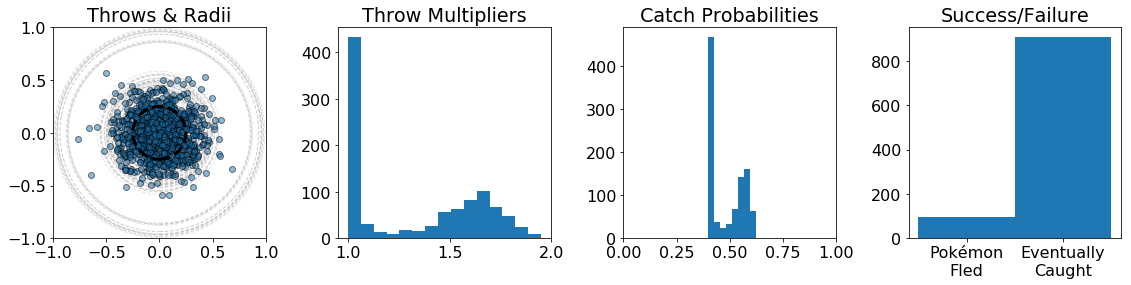

In [408]:
plt.figure(figsize=(16,4.25))
plt.subplot(141, title='Throws & Radii')
plt.scatter([x for x,y,r in xyrs], [y for x,y,r in xyrs], alpha=0.5, edgecolors='black')
plt.gca().add_artist(plt.Circle((0,0), 0.25, color='black', fill=False, ls='--', lw=3))
for x,y,r in xyrs[:100]:
  plt.gca().add_artist(plt.Circle((0,0), r, color=(0,0,0,0.1), fill=False, ls='--'))
plt.xlim(-1,1); plt.ylim(-1,1)
plt.subplot(142, title='Throw Multipliers')
plt.hist(throws, bins=15)
plt.subplot(143, title='Catch Probabilities')
plt.hist(probs, bins=8)
plt.xlim(0,1)
plt.subplot(144, title='Success/Failure')
plt.hist(catches, bins=2)
plt.xticks([0.25, 0.75], ['Pokémon\nFled', 'Eventually\nCaught'])
plt.tight_layout()
plt.show()

## 3.4 But Wait! What about Pokemon Attacks?

One thing we _didn't_ factor into our Monte Carlo simulation is whether the Pokemon executes a Jump or Attack animation. When this happens, our throw fails.

Now, a failed throw in this case doesn't actually cause wild Pokémon to flee. However, this _is_ a significant issue for Raid Bosses, because in those cases, we have a limited supply of Poké Balls.

It turns out that the _time between_ Pokémon attacks is well-modeled by a Geometric distribution, the discrete analogue of an Exponential:

![hey](https://pokemongo.gamepress.gg/sites/pokemongo/files/inline-images/image%20%2897%29.png)
(source: [gamepress](https://pokemongo.gamepress.gg/jump-attack))

## 3.5 But doesn't that mean...

Yes! That means Pokémon attacks are well-modeled by a Poisson process!

## 3.6 Live Poisson-Gamma Experiment!

Alright folks! We are going to attempt to model the _rate_ at which different wild Pokémon have attack or jump animations.

Let's:
- wait for a particular wild Pokémon to appear
- all tap on that Pokémon to enter the catch screen
- set a timer
- count the number of times the Pokémon jumps or attacks (track them separately)

Afterwards, we'll count up the number of jumps and attacks we observe in a fixed time interval (and subtract the length of the animations) to obtain data about the rate. Assuming a simple Gamma prior, we can update it to get a posterior estimate of the rate parameter (whose true value I know).

In [461]:
results = [
  (6, 7), # Weiwei
  (7, 6), # Javier
  (4, 3), # Ike
  (6, 7), # Melanie
  (5, 7), # Joe
  (3, 5)  # Andrew
]

# Assume prior of 1/6
prior_count = 1
prior_time = 6

posterior_count = (prior_count + sum(a+j for j,a in results))
posterior_time = (prior_time + sum([60-2*a-1.0*j for j,a in results]))

### Statistics works!!

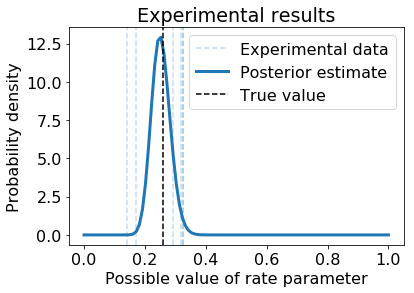

In [474]:
shape, rate = posterior_count, posterior_time
def pdf(x):
  return (rate**shape/gamma(shape)) * x**(shape-1) * np.exp(-1 * rate * x)

x = np.linspace(0, 1, 100)
y = [pdf(x_i) for x_i in x]
plt.title('Experimental results')
for i,(j,a) in enumerate(results):
  plt.axvline((a+j) / (60-2*a-1*j), alpha=0.25, ls='--', label=(None if i else 'Experimental data'))
plt.plot(x,y, lw=3, label='Posterior estimate')
plt.axvline(.2 / .77, color='black', ls='--', label='True value')
plt.legend(loc='best')
plt.xlabel('Possible value of rate parameter')
plt.ylabel('Probability density')
plt.show()

# Conclusion: Pokémon Stop

Let's get back to work >_<